**By R10741002 商研碩二 杜昕**

# 1. Read Files

In [1]:
import re

# Read Files to List
doc_num = 91
question_doc = []
choice_doc = []
ans_doc = []

for i in range(1, doc_num + 1):
    try:
        with open(f'Data/Question/{i}.txt', encoding='utf-8') as f:
            raw_q = f.read()
    except:
        with open(f'Data/Question/{i}.txt', encoding='big5') as f:
            raw_q = f.read()
    try:
        with open(f'Data/Choice/{i}.txt', encoding='utf-8') as f:
            raw_ch = f.read()
    except:
        with open(f'Data/Choice/{i}.txt', encoding='big5') as f:
            raw_ch = f.read()
    try:
        with open(f'Data/Answer/{i}.txt', encoding='utf-8') as f:
            raw_a = f.read()
    except:
        with open(f'Data/Answer/{i}.txt', encoding='big5') as f:
            raw_a = f.read()
    question_doc.append([s.strip() for s in re.split('\(1\)|\(2\)|\(3\)|\(4\)|\(5\)', raw_q.lower())])
    choice_doc.append([s.strip() for s in re.sub(r'\([a-f]\)', '', raw_ch.lower()).split('\n')])
    ans_doc.append([ord(a) - 64 for a in list(raw_a)])

# 2. Cosine similarity
ref:
1. https://github.com/sudharsan13296/Getting-Started-with-Google-BERT/blob/main/8.%20Exploring%20Sentence%20and%20Domain%20Specific%20BERT/8.07.%20Finding%20a%20similar%20sentence%20with%20Sentence-BERT%20.ipynb
2. https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.linear_sum_assignment.html
3. https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=7738348

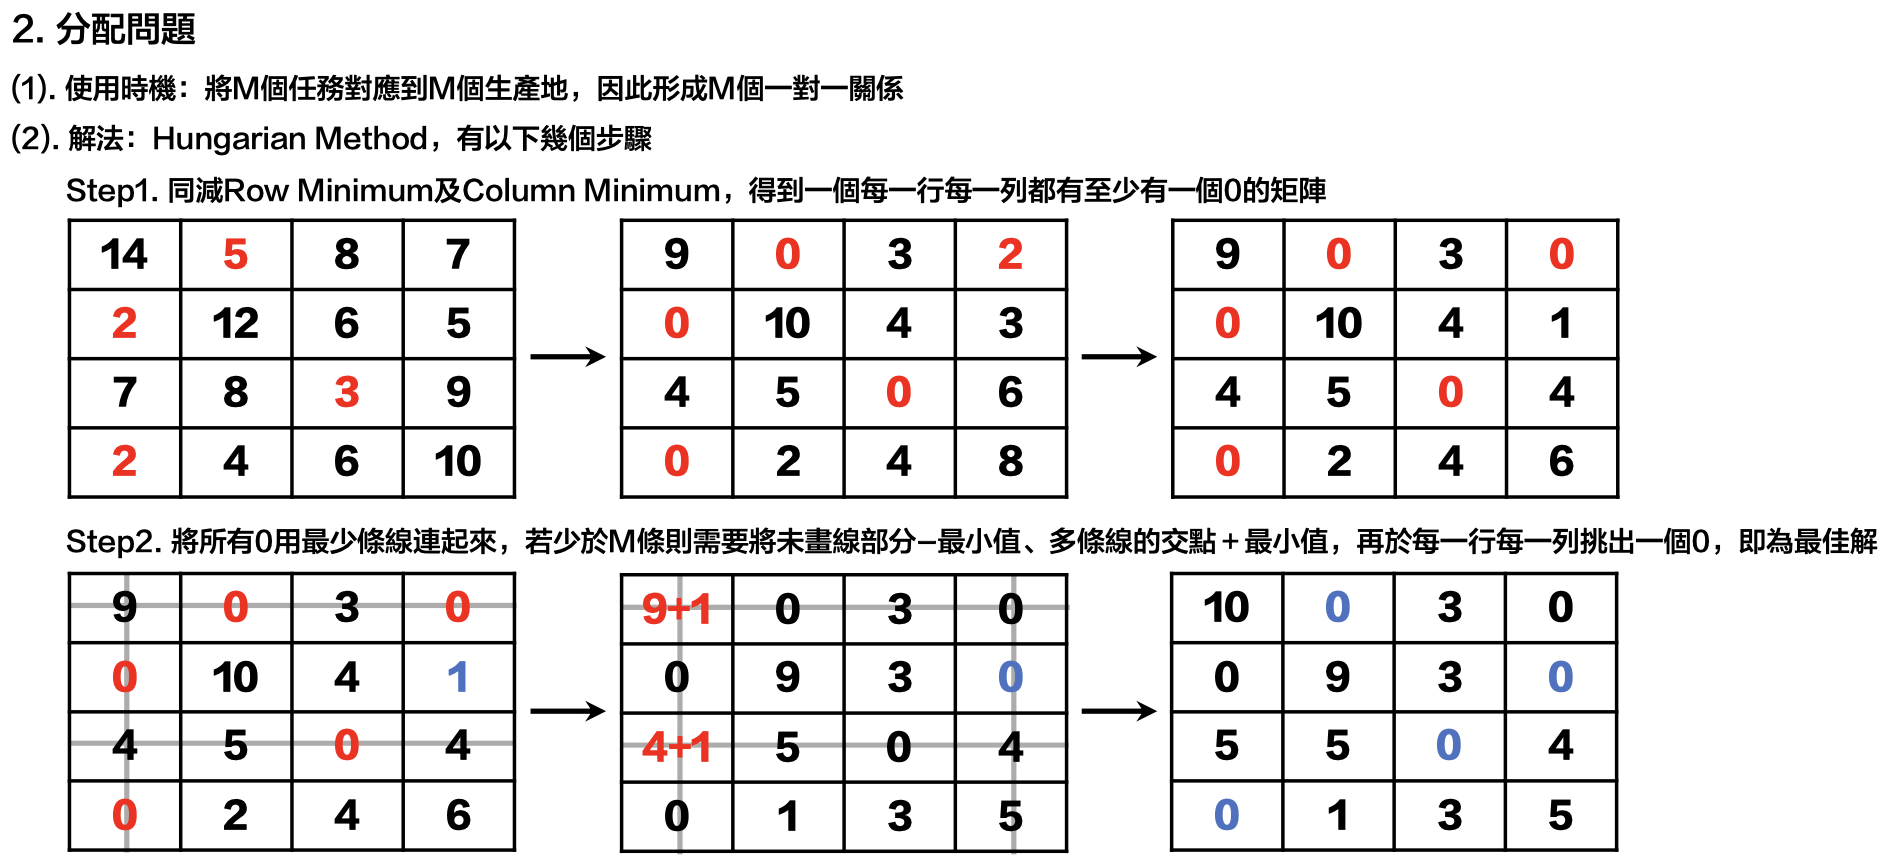

In [2]:
!pip3 install sentence_transformers

from sentence_transformers import SentenceTransformer, util
from scipy.optimize import linear_sum_assignment
import numpy as np
model = SentenceTransformer('bert-base-nli-mean-tokens')

accuracy_list = []

for i in range(doc_num): # each document
    question_representation = model.encode([question_doc[i][j] + question_doc[i][j + 1] for j in range(len(question_doc[i]) - 1)], convert_to_tensor=True)  # length: m
    choice_representation = model.encode(choice_doc[i], convert_to_tensor=True)  # length: n
    similarity = -util.pytorch_cos_sim(question_representation, choice_representation).numpy()  # length: m*n, 加負號是為了計算分配問題
    # 根據 Similarity 分配
    row_ind, col_ind = linear_sum_assignment(similarity)
    col_ind += 1
    ans_check = (col_ind == np.array(ans_doc[i]))
    correct = sum(ans_check)
    total = len(ans_check)
    print('No.{}： 答對率：{} / {}，您的答案：{}，正確答案：{}'.format(i + 1, correct, total, col_ind, np.array(ans_doc[i])))
    accuracy_list.append([correct, total, len(choice_representation), correct / total])  # 對幾題、共幾題、共幾個選項、答對率

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 785.3 kB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 6.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 16.9 MB/s eta 0:00:00a 0:00:01
  Created wheel for sentence_transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125925 sha256=b173ee2a343e6e205170c54de4fedbd21ff850abac193da12f81a042f29e5ead
  Stored in directory: /Users/wangtingyun/Library/Caches/pip/wheels/0a/f5/dd/9d00836c4e9e279c2a59d5b0ab72dafa66cbc626a327c550dd
Successfully built sentence_transformers


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Downloading: 100%|██████████| 190/190 [00:00<00:00, 30.1kB/s]
Downloading: 100%|██████████| 3.95k/3.95k [00:00<00:00, 564kB/s]
Downloading: 100%|██████████| 2.00/2.00 [00:00<00:00, 291B/s]
Downloading: 100%|██████████| 122/122 [00:00<00:00, 20.3kB/s]
Downloading: 100%|██████████| 438M/438M [00:49<00:00, 8.79MB/s] 
Downloading: 100%|██████████| 53.0/53.0 [00:00<00:00, 7.01kB/s]
Downloading: 100%|██████████| 112/112 [00:00<00:00, 21.6kB/s]
Downloading: 100%|██████████| 466k/466k [00:00<00:00, 481kB/s]  
Downloading: 100%|██████████| 399/399 [00:00<00:00, 86.1kB/s]
Downloading: 100%|██████████| 232k/232k [00:00<00:00, 270kB/s]  
Downloading: 100%|██████████| 229/229 [00:00<00:00, 37.8kB/s]


No.1： 答對率：1 / 5，您的答案：[5 3 4 2 1]，正確答案：[5 4 3 1 2]
No.2： 答對率：2 / 5，您的答案：[1 4 5 3 2]，正確答案：[5 4 3 1 2]
No.3： 答對率：3 / 5，您的答案：[4 2 1 5 3]，正確答案：[4 2 5 1 3]
No.4： 答對率：0 / 5，您的答案：[2 1 4 5 3]，正確答案：[3 5 1 4 2]
No.5： 答對率：1 / 5，您的答案：[5 3 1 2 4]，正確答案：[3 2 5 1 4]
No.6： 答對率：2 / 5，您的答案：[4 5 3 1 2]，正確答案：[3 5 1 4 2]
No.7： 答對率：1 / 5，您的答案：[5 4 2 3 1]，正確答案：[2 4 1 5 3]
No.8： 答對率：2 / 5，您的答案：[3 1 4 5 2]，正確答案：[1 5 4 3 2]
No.9： 答對率：3 / 5，您的答案：[5 3 1 4 2]，正確答案：[5 3 4 1 2]
No.10： 答對率：3 / 5，您的答案：[5 1 4 2 3]，正確答案：[5 4 1 2 3]
No.11： 答對率：3 / 5，您的答案：[6 1 4 5 3]，正確答案：[6 4 1 5 3]
No.12： 答對率：2 / 5，您的答案：[2 3 5 4 6]，正確答案：[2 1 4 5 6]
No.13： 答對率：1 / 5，您的答案：[1 6 4 3 5]，正確答案：[2 4 6 1 5]
No.14： 答對率：2 / 5，您的答案：[5 2 1 3 6]，正確答案：[5 1 6 3 4]
No.15： 答對率：0 / 5，您的答案：[1 5 4 2 6]，正確答案：[5 1 2 6 3]
No.16： 答對率：0 / 5，您的答案：[2 3 5 6 1]，正確答案：[6 5 3 2 4]
No.17： 答對率：1 / 5，您的答案：[1 4 3 5 6]，正確答案：[3 6 1 5 4]
No.18： 答對率：4 / 5，您的答案：[6 4 3 5 1]，正確答案：[6 4 3 5 2]
No.19： 答對率：2 / 5，您的答案：[6 2 5 3 4]，正確答案：[6 2 4 5 3]
No.20： 答對率：3 / 5，您的答案：[5 4 1 3 6]，正確答案：[

# 3. Stats

In [3]:
import pandas as pd

result_eval = pd.DataFrame(accuracy_list, columns=['Correct #', 'Question #', 'Option #', 'Correct %'])
display(result_eval['Correct %'].value_counts().to_frame())
display(result_eval.iloc[0:22]['Correct %'].value_counts().to_frame())
display(result_eval.iloc[22:42]['Correct %'].value_counts().to_frame())
display(result_eval.iloc[42:62]['Correct %'].value_counts().to_frame())
display(result_eval.iloc[62:91]['Correct %'].value_counts().to_frame())
# 1~22 / 23~42 / 43~62 / 63~91

,Correct %
0.40,24
0.00,17
0.20,16
0.60,16
0.50,8
0.80,4
0.25,4
1.00,2


,Correct %
0.4,8
0.2,5
0.6,5
0.0,3
0.8,1


,Correct %
0.50,8
0.00,6
0.25,4
1.00,2


,Correct %
0.4,7
0.0,5
0.6,4
0.2,3
0.8,1


,Correct %
0.4,9
0.2,8
0.6,7
0.0,3
0.8,2


In [4]:
from itertools import permutations 

perm_4_4 = pd.DataFrame(permutations(['A', 'B', 'C', 'D']), columns=[1, 2, 3, 4])
perm_5_5 = pd.DataFrame(permutations(['A', 'B', 'C', 'D', 'E']), columns=[1, 2, 3, 4, 5])
perm_5_6 = pd.DataFrame(permutations(['A', 'B', 'C', 'D', 'E', 'F']), columns=[1, 2, 3, 4, 5, 'Unuse'])

perm_4_4['Correct %'] = (np.where(perm_4_4[1] == 'A', 1, 0) + np.where(perm_4_4[2] == 'B', 1, 0) + np.where(perm_4_4[3] == 'C', 1, 0) + np.where(perm_4_4[4] == 'D', 1, 0)) / 4
perm_5_5['Correct %'] = (np.where(perm_5_5[1] == 'A', 1, 0) + np.where(perm_5_5[2] == 'B', 1, 0) + np.where(perm_5_5[3] == 'C', 1, 0) + np.where(perm_5_5[4] == 'D', 1, 0) + np.where(perm_5_5[5] == 'E', 1, 0)) / 5
perm_5_6['Correct %'] = (np.where(perm_5_6[1] == 'A', 1, 0) + np.where(perm_5_6[2] == 'B', 1, 0) + np.where(perm_5_6[3] == 'C', 1, 0) + np.where(perm_5_6[4] == 'D', 1, 0) + np.where(perm_5_6[5] == 'E', 1, 0)) / 5

print('Expectations: {:.4f}'.format(perm_4_4['Correct %'].mean()))
print('Expectations: {:.4f}'.format(perm_5_5['Correct %'].mean()))
print('Expectations: {:.4f}'.format(perm_5_6['Correct %'].mean()))

Expectations: 0.2500
Expectations: 0.2000
Expectations: 0.1667
